<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/04_Gradiente_Descendente_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradiente Descendente

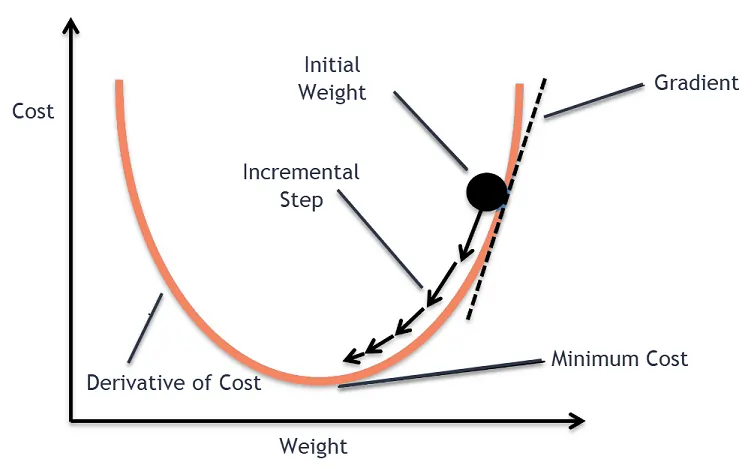

El gradiente descendente es un algoritmo de optimización iterativo que busca minimizar la función de pérdida (o coste) ajustando los parámetros (pesos) de la red neuronal.

**Pasos del algoritmo:**

1. **Inicialización**: Se inicializan los pesos de la red neuronal con valores aleatorios pequeños.

2. **Propagación hacia adelante (Forward Pass)**:

  - Los datos de entrada pasan a través de la red.

  - Cada capa aplica una transformación (producto punto + función de activación).

  - Se obtiene una predicción final.

  - Se calcula la pérdida comparando la predicción con el valor real.

3. **Cálculo del gradiente**:

  - Para cada peso, se calcula cómo un pequeño cambio en ese peso afectaría la pérdida total.

  - Esto se hace usando derivadas parciales (cálculo diferencial).

4. **Actualización de pesos**:

  - Los pesos se actualizan en la dirección opuesta al gradiente (por eso es "descendente").

    - Fórmula básica:   **w = w - learning_rate * ∇L(w)**

    - w: peso

    - learning_rate: tasa de aprendizaje (hiperparámetro)

    - ∇L(w): gradiente de la función de pérdida respecto al peso

5. **Repetición**:

  - Se repiten los pasos 2-4 hasta convergencia o por un número fijo de épocas.

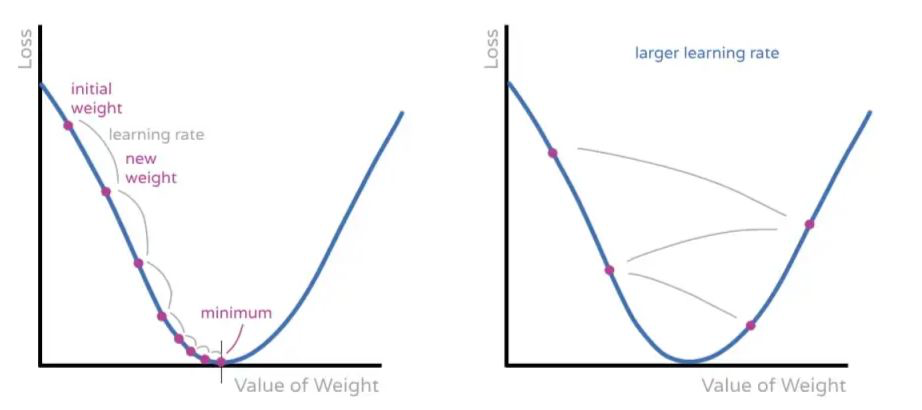

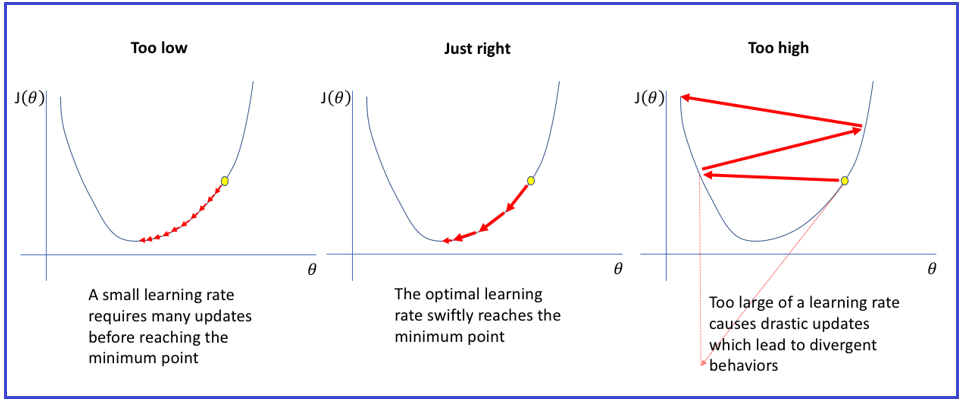

## **Variantes del gradiente descendente en Keras**

Keras implementa varias variantes del gradiente descendente:

1. **SGD (Stochastic Gradient Descent)**:

  -  versión más básica.

  - Actualiza los pesos después de cada muestra (o mini-lote).

  - Muy sensible al learning rate.

  **keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)**

2. **SGD con Momentum**:

  - Acumula un "impulso" en la dirección del gradiente.

  - Ayuda a evitar oscilaciones y acelera la convergencia.

  **keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)**

3. **RMSprop**:

  - Adapta el learning rate para cada parámetro.

  - Divide el learning rate por una media móvil de los gradientes recientes.

  **keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)**

4. **Adam (Adaptive Moment Estimation)**:

  - Combina ideas de Momentum y RMSprop.

  - Mantiene learning rates adaptativos para cada parámetro.

  - Generalmente funciona bien sin mucha configuración.

  **keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)**

## Learning Rate

(tasa de aprendizaje) es un hiperparámetro clave en los algoritmos de entrenamiento de modelos de machine learning y deep learning. Controla cuánto se ajustan los pesos del modelo en cada iteración (o paso de optimización) con respecto al gradiente de la función de pérdida.



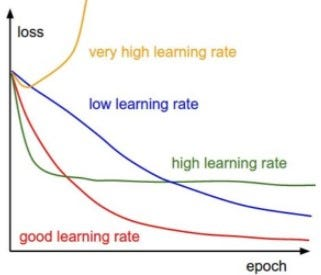

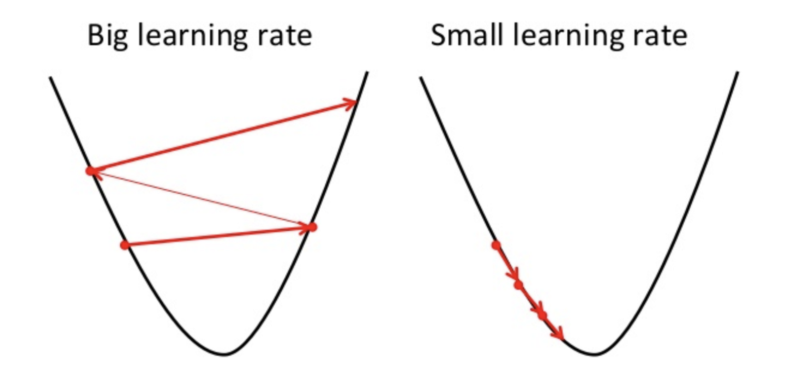

## Diferencia Backpropagation, Función de Pérdida y Gradiente Descendente

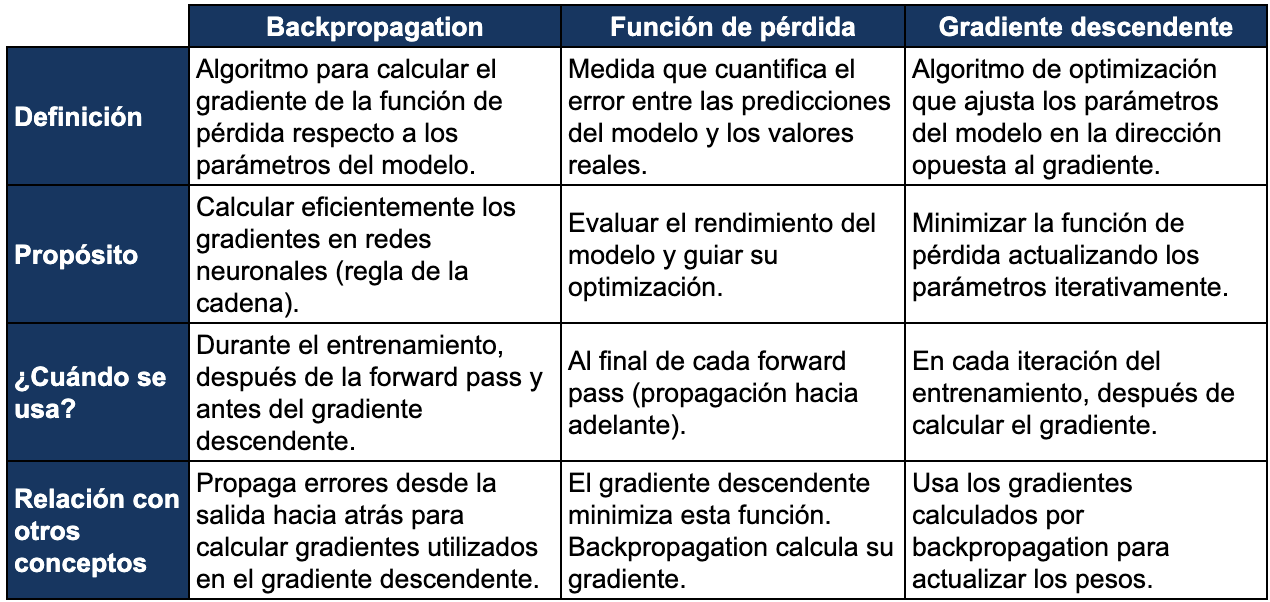

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Cargar el dataset directamente desde Kaggle
data = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Mostrar las primeras filas
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


# Preprocesamiento

In [ ]:
# Separar características y objetivo
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construcción del Modelo (Arquitectura)

**Recordatorio Dropout:**

Durante el entrenamiento, el dropout desactiva aleatoriamente (pone a cero) una fracción de las neuronas en una capa en cada iteración. Esto significa que algunas neuronas no participan en la propagación hacia adelante (forward pass) ni en la retropropagación (backward pass) en un paso dado.

Si configuramos un dropout del 20% (Dropout(0.2)), en cada paso de entrenamiento, el 20% de las neuronas de esa capa se "apagarán" aleatoriamente.

Ventajas:

- **Reduce el sobreajuste**: Evita que la red dependa demasiado de neuronas específicas, fomentando que todas aprendan características útiles.

- **Mejora la generalización**: La red se vuelve más robusta y funciona mejor con datos no vistos (test set).

- **Simula un ensamble de redes**: Al apagar neuronas aleatoriamente, cada paso de entrenamiento trabaja con una "sub-red" diferente, lo que se asemeja a entrenar múltiples redes y promediar sus resultados.

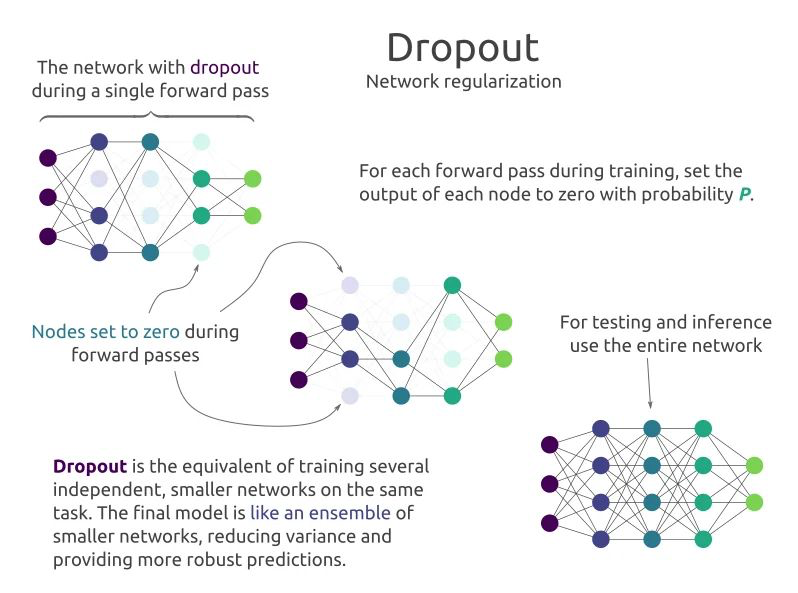

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


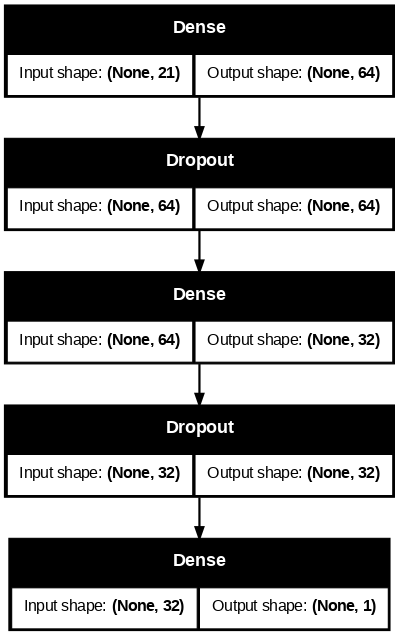

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 1ª Capa oculta (64 neuronas)
    layers.Dropout(0.3),                                                  # Capa de Dropout (regularización)
    layers.Dense(32, activation='relu'),                                  # 2ª Capa oculta (32 neuronas)
    layers.Dropout(0.3),                                                  # Capa de Dropout (regularización)
    layers.Dense(1, activation='sigmoid')                                 # Capa de salida (1 neurona)
])

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=80)

# Compilación Modelo

In [ ]:
# Compilar el modelo
model.compile(
    optimizer='adam',  # Usamos Adam, una variante avanzada de gradiente descendente
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento Modelo

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7093 - loss: 0.5648 - val_accuracy: 0.7459 - val_loss: 0.5056
Epoch 2/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7509 - loss: 0.5145 - val_accuracy: 0.7496 - val_loss: 0.5048
Epoch 3/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7505 - loss: 0.5141 - val_accuracy: 0.7491 - val_loss: 0.5058
Epoch 4/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7528 - loss: 0.5130 - val_accuracy: 0.7486 - val_loss: 0.5017
Epoch 5/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7522 - loss: 0.5093 - val_accuracy: 0.7495 - val_loss: 0.5018
Epoch 6/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7507 - loss: 0.5105 - val_accuracy: 0.7493 - val_loss: 0.5029
Epoch 7/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7546 - loss: 0.5111 - val_accuracy: 0.7526 - val_loss: 0.5016
Epoch 8/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7566 - loss: 0.5059 - 

In [ ]:
# Evaluación
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nMétricas de evaluación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nExactitud (accuracy):", accuracy_score(y_test, y_pred))


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Métricas de evaluación:
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74      7090
         1.0       0.73      0.82      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.75     14139
weighted avg       0.76      0.76      0.75     14139


Matriz de confusión:
[[4901 2189]
 [1273 5776]]

Exactitud (accuracy): 0.7551453426692128


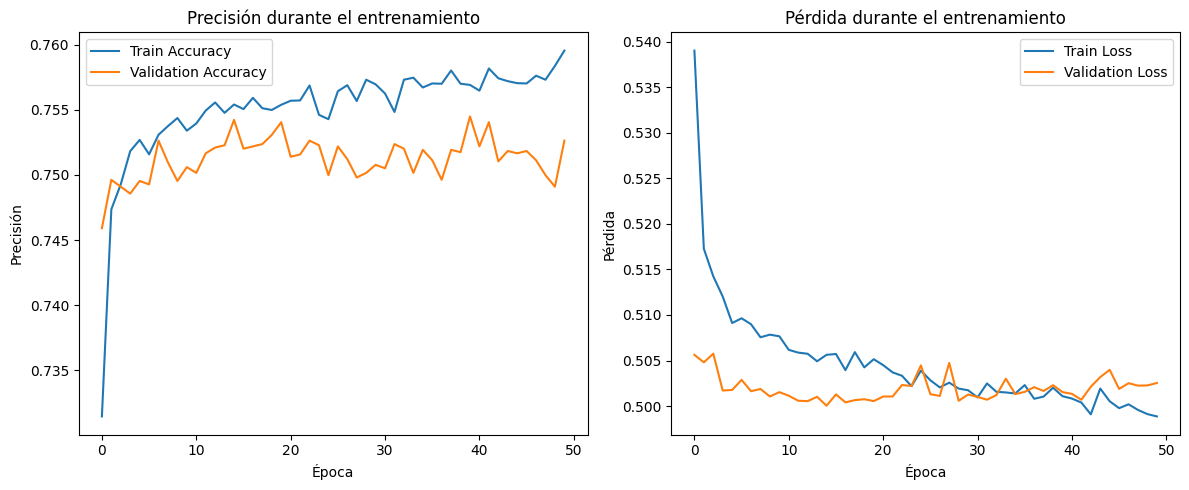

In [ ]:
# Visualización del entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()